In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
def Bmatrix_12_11(r,m):
    B=np.zeros([m+1,m+1])
    for i in range(0,m+1):B[i,i]=1+2*r
    for i in range(0,m):B[i,i+1]=-r;B[i+1,i]=-r
    return B

def numerical_heateq(B,ini,m,n):
    U=np.zeros([m+1,n+1])
    U[:,0]=ini.transpose()
    for i in range(0,n-1):
        U[:,i+1]=np.linalg.solve(B,U[:,i])
        U[m,i+1]=0;U[0,i+1]=0
    return U.transpose()

In [20]:
#partitioning the blocks(x)
m=1000
#partitioning the blocks(t)
n=1000
#Initial Conditions
xini=0
xend=5
tini=0
tend=1

ini=np.zeros([m+1,1])
for i in range(0,m+1):
    ini[i,0]=((xend-xini)*i/m)*np.sin((xend-xini)*i/m)
#Heat Equation Constant
c=1.25
r=(c*(tend-tini)/n)/(((xend-xini)/m)**2)

In [21]:
U=numerical_heateq(Bmatrix_12_11(r,m),ini,m,n)

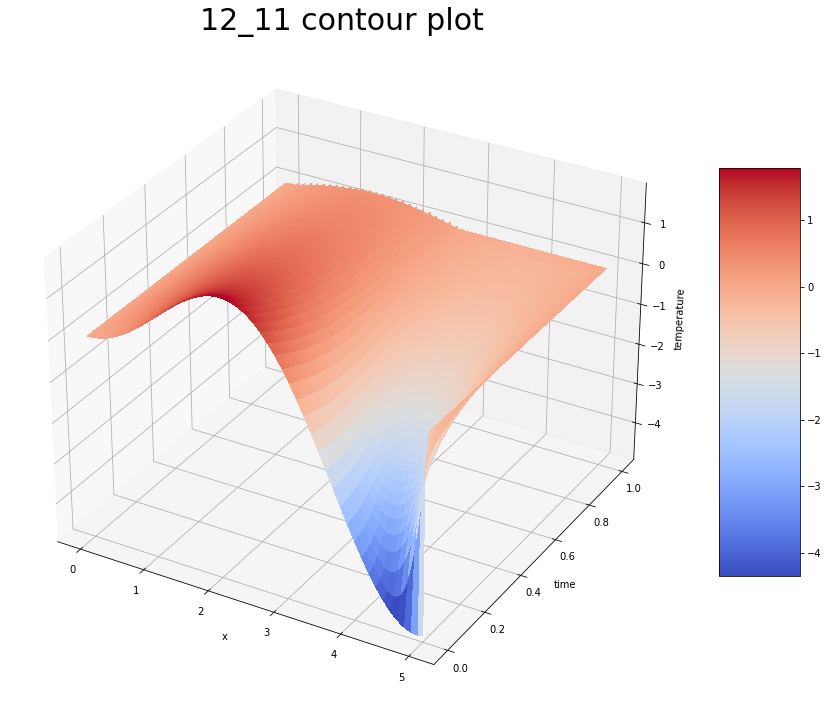

In [31]:
tempx = np.linspace(xini, xend, m+1)
tempy = np.linspace(tini, tend, n+1)
x, y = np.meshgrid(tempx, tempy)
z = U

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
fig.set_size_inches(15, 15)
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('x')
ax.set_ylabel('time')
ax.set_zlabel('temperature')
ax.set_title('12_11 contour plot', fontsize=30)
plt.show()